## performing OCR with SVMs

### collecting data

In [46]:
import pandas as pd

letters = pd.read_csv("letterdata.csv")
print(letters.info())
print(letters.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None
(20000, 17)


### exploring and preparing the data

In [47]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [48]:
from sklearn.model_selection import train_test_split

training_points = letters.drop(columns=['letter'])
training_labels = letters['letter']
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.2,
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 16)
(16000,)
(4000, 16)
(4000,)


### training a model on the data

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Train the classifier
letter_classifier = SVC(kernel='linear')
letter_classifier.fit(X_train, y_train)

SVC(kernel='linear')

### evaluating model performance

In [50]:
# Make predictions
letter_predictions = letter_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, letter_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.855


In [51]:
letter_predictions[:6]

array(['D', 'K', 'H', 'E', 'V', 'S'], dtype=object)

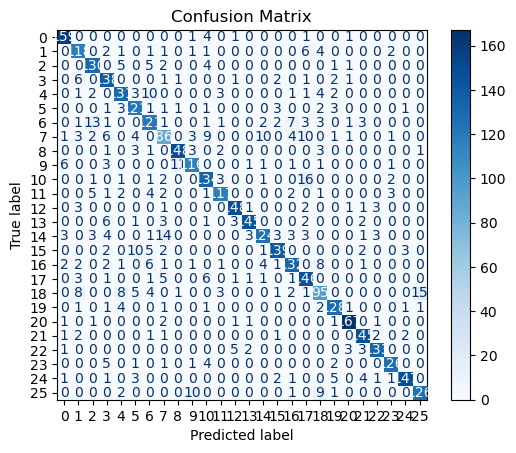

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, letter_predictions)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [53]:
agreement = (letter_predictions == y_test)

correct_predictions = np.sum(agreement)

agreement_counts = {"FALSE": len(agreement) - sum(agreement), "TRUE": sum(agreement)}
print("SVC(kernel='linear'):")
print(agreement_counts)

SVC(kernel='linear'):
{'FALSE': 580, 'TRUE': 3420}


### improving model performance

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

letter_classifier_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

letter_classifier_rbf.fit(X_train, y_train)

# predictions
letter_predictions_rbf = letter_classifier_rbf.predict(X_test)

agreement_rbf = (letter_predictions_rbf == y_test)

agreement_rbf_counts = {"FALSE": len(agreement_rbf) - sum(agreement_rbf), "TRUE": sum(agreement_rbf)}
print("Gaussian RBF kernel predictions:")
print(agreement_rbf_counts)


accuracy_rbf = accuracy_score(y_test, letter_predictions_rbf)
print(f"Accuracy RBF Model: {accuracy_rbf:.2f}")

Gaussian RBF kernel predictions:
{'FALSE': 288, 'TRUE': 3712}
Accuracy RBF Model: 0.93
